# Cornell Movie Review Dataset - Preprocessing

In [1]:
dataset = "Cornell Movie Review Dataset"

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
import chardet

with open(f'../Datasets/Raw/{dataset}/polarity.pos', 'rb') as file:
    # Read some bytes from the file
    rawdata = file.read(1024*10)
    # Detect the encoding
    encoding = chardet.detect(rawdata)['encoding']

In [5]:
positivelines = None
with open(f'../Datasets/Raw/{dataset}/polarity.pos', 'r', encoding=encoding) as file:
    # Read the lines from the file
    positivelines = file.readlines()

negativelines = None
with open(f'../Datasets/Raw/{dataset}/polarity.neg', 'r', encoding=encoding) as file:
    # Read the lines from the file
    negativelines = file.readlines()

In [6]:
data = pd.DataFrame(columns=['TEXT', 'CLASS'])

In [7]:
for line in positivelines:
    # Create a new row as a Series
    new_row = pd.Series([str(line).strip(), 1], index=data.columns)
    # Add the new row to the DataFrame
    data.loc[len(data)] = new_row

for line in negativelines:
    # Create a new row as a Series
    new_row = pd.Series([str(line).strip(), 0], index=data.columns)
    # Add the new row to the DataFrame
    data.loc[len(data)] = new_row

In [8]:
data.sample(5)

,TEXT,CLASS
6627,"for most movies , 84 minutes is short , but th...",0
2796,"even when there are lulls , the emotions seem ...",1
4650,"writer-director david jacobson and his star , ...",1
2210,"a taut , sobering film .",1
3132,could this be the first major studio productio...,1


In [9]:
data.shape

(10662, 2)

In [10]:
data.describe()

,TEXT,CLASS
count,10662,10662
unique,10662,2
top,the rock is destined to be the 21st century's ...,1
freq,1,5331


In [11]:
data.isna().sum()

TEXT     0
CLASS    0
dtype: int64

In [12]:
data.nunique()

TEXT     10662
CLASS        2
dtype: int64

In [13]:
from Preprocessor import preprocess

[nltk_data] Downloading package punkt to /Users/devarajag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devarajag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/devarajag/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
field = "TEXT"

In [15]:
for i in range(len(data[field])):
    data['TEXT'][i] = preprocess(data[field][i])

In [16]:
data.sample(5)

,TEXT,CLASS
389,anderson use hit miss aesthet hit often enough...,1
8500,like christma movi elv snow le pimp ho,0
1082,yet anoth studio horror franchis muck storylin...,1
6196,complet shambl movi sloppi uneven damn unpleas...,0
528,majidi poetic love stori ravish conscious rais...,1


In [17]:
data.rename(columns = {'class':'CLASS'}, inplace = True)

In [19]:
data.to_csv(f'../Datasets/Preprocessed/{dataset}/data.csv')

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

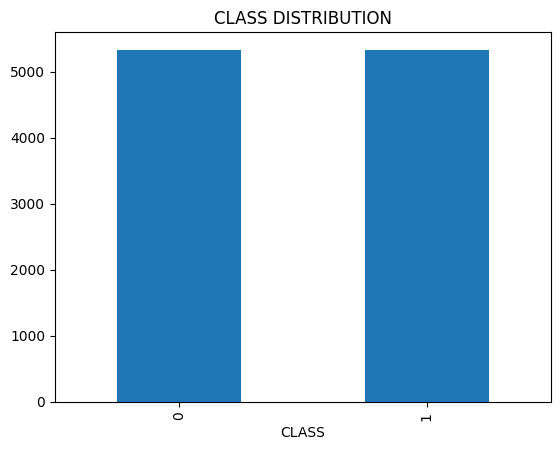

In [21]:
data.groupby('CLASS')['CLASS'].count().plot.bar()
plt.title('CLASS DISTRIBUTION')
plt.show()

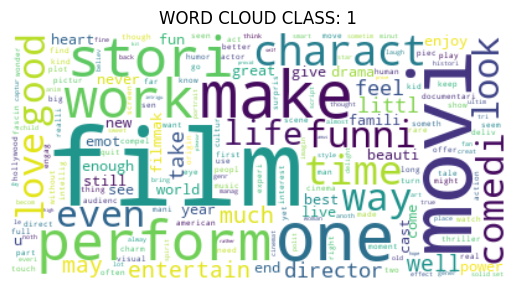

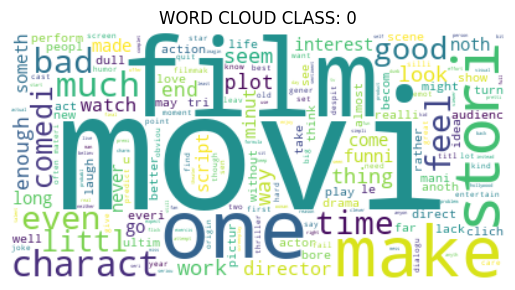

In [22]:
for value in data['CLASS'].unique():
    text = ' '.join(x for x in data[data['CLASS'] == value]['TEXT'])
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'WORD CLOUD CLASS: {value}')
    plt.show()